# **Notebook de estudo01: análise do banco de dados sobre Performace de estudantes em provas!**

# 1. Introdução

A análise de dados abaixo foi realizada utilizando o dataset sobre a performance de discentes em provas nos Estados Unidos disponibilizados no site www.kaggle.com.

A motivação para realizar esta análise surgiu em entender se pequenas questões sociais, econômicas e pessoais podem impactar no rendimento escolar dos alunos. Com isso, ao entender estas questões, pode-se criar estratégias de ensino e abordagens pedagógicas que auxiliem em uma maior performance dos estudantes em provas escolares.

  - Perguntas que visamos responder com esta análise:
    * O nivel de formação educacional dos pais interfere no desempenho dos filhos nas provas?
    * O investimento em um curso preparativo auxiliou em uma maior nota?
    * Existiu diferença em cada tipo de prova entre os gêneros?
    * Existe alguma correlação entre as notas das provas?
    * Existe alguma associação entre o acesso completo ao almoço com a performance dos estudantes?

Fonte do dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/discussion/365468?select=StudentsPerformance.csv

## Variáveis do dataset:

    - gender: generos dos estudantes;
    
    - race/ethnicity: grupo étnico dos estudantes;
    
    - parental level of education: Nivel de instrução dos pais;
    
    - lunch: Acesso ao almoço na escola pelo estudante;
    
    - test preparation course: Curso preparatório para as provas;
    
    - math score: nota da prova de matemática;
    
    - reading score: nota da prova de leitura;
    
    - writing score: nota da prova de escrita.




# 2. Análise Inicial dos dados:

## Importar bibliotecas:




In [1]:
# carregar bibliotecas para utilizar:
import pandas as pd
import numpy as np

import os

import seaborn as sbs
import matplotlib.pyplot as plt

## Importar o dataset:

In [2]:
## Qual o diretório dos dados:
path = ('C:/Users/maced/Desktop/Mentoria Anwar')

os.chdir(path)

os.listdir()

['.ipynb_checkpoints',
 'Análise_dados_PreçoCasas.ipynb',
 'Customer Personality Analysis.ipynb',
 'duvidas 21-10.txt',
 'Estudos Pandas + Numpy + PLT.ipynb',
 'Mentoria - Lucas Macedo.pdf',
 'Portifólio',
 'Primeiro passo de um portifólio de EDA.docx',
 'Projeto_Performance_Estudantes.ipynb',
 'StudentsPerformance.csv']

In [3]:
## Lê o banco de dados:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
print(f"O dataset utilizado para a análise a seguir possui {df.shape[0]} linhas e {df.shape[1]} colunas!")

O dataset utilizado para a análise a seguir possui 1000 linhas e 8 colunas!


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum() #os valores não apresentam NA

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#Renomeação das colunas do dataset:
df.columns = ['genero','Etnia','Inst_parental','Acesso_almoço','Curso_prep','Pont_mat', 'Pont_leitura','Pont_escrita']

In [10]:
df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
## Substituir 'Male' e 'female' por 'Homem' e 'Mulher' na variavel 'genero':
df['genero'] = df['genero'].map({'female': 'Mulher', 'male': 'Homem'})

In [12]:
df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita
0,Mulher,group B,bachelor's degree,standard,none,72,72,74
1,Mulher,group C,some college,standard,completed,69,90,88
2,Mulher,group B,master's degree,standard,none,90,95,93
3,Homem,group A,associate's degree,free/reduced,none,47,57,44
4,Homem,group C,some college,standard,none,76,78,75


In [13]:
# Criação de uma nova variável: Tipo_formação_parental ,divida em dois níveis: "Form_superior" x "Form_básica"
## Formação superior: master's degree, bachelor's degree, associate's degree
## Formação básica: high school, some high school, some college

level = [(df['Inst_parental'] == "master's degree"),
         (df['Inst_parental'] == "associate's degree"),
         (df['Inst_parental'] == "bachelor's degree"),
         (df['Inst_parental'] == 'some college'),
         (df['Inst_parental'] == 'high school'),
         (df['Inst_parental'] == 'some high school')]

condi = ['Form_superior','Form_superior','Form_superior','Form_basica','Form_basica','Form_basica']

df['Tipo_formação_parental'] = np.select(level,condi)
df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita,Tipo_formação_parental
0,Mulher,group B,bachelor's degree,standard,none,72,72,74,Form_superior
1,Mulher,group C,some college,standard,completed,69,90,88,Form_basica
2,Mulher,group B,master's degree,standard,none,90,95,93,Form_superior
3,Homem,group A,associate's degree,free/reduced,none,47,57,44,Form_superior
4,Homem,group C,some college,standard,none,76,78,75,Form_basica


In [14]:
## Ajustar a variável 'Acesso_almoço' para: 'Total' x 'Reduzido':
df['Acesso_almoço'].unique()

df['Acesso_almoço'] = df['Acesso_almoço'].map({'standard' : 'Total', 'free/reduced' : 'Reduzido'})

df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita,Tipo_formação_parental
0,Mulher,group B,bachelor's degree,Total,none,72,72,74,Form_superior
1,Mulher,group C,some college,Total,completed,69,90,88,Form_basica
2,Mulher,group B,master's degree,Total,none,90,95,93,Form_superior
3,Homem,group A,associate's degree,Reduzido,none,47,57,44,Form_superior
4,Homem,group C,some college,Total,none,76,78,75,Form_basica


In [15]:
## Ajustar a variável "Curso_prep": 'Sim' x 'Não'
df['Curso_prep'] = df['Curso_prep'].replace('completed','Sim')
df['Curso_prep'] = df['Curso_prep'].replace('none','Nao')

df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita,Tipo_formação_parental
0,Mulher,group B,bachelor's degree,Total,Nao,72,72,74,Form_superior
1,Mulher,group C,some college,Total,Sim,69,90,88,Form_basica
2,Mulher,group B,master's degree,Total,Nao,90,95,93,Form_superior
3,Homem,group A,associate's degree,Reduzido,Nao,47,57,44,Form_superior
4,Homem,group C,some college,Total,Nao,76,78,75,Form_basica


In [16]:
## Criar uma coluna com média das três notas:
df['Med_final'] = round((df['Pont_mat'] + df['Pont_leitura'] + df['Pont_escrita']) / 3,2)

df.head()

,genero,Etnia,Inst_parental,Acesso_almoço,Curso_prep,Pont_mat,Pont_leitura,Pont_escrita,Tipo_formação_parental,Med_final
0,Mulher,group B,bachelor's degree,Total,Nao,72,72,74,Form_superior,72.67
1,Mulher,group C,some college,Total,Sim,69,90,88,Form_basica,82.33
2,Mulher,group B,master's degree,Total,Nao,90,95,93,Form_superior,92.67
3,Homem,group A,associate's degree,Reduzido,Nao,47,57,44,Form_superior,49.33
4,Homem,group C,some college,Total,Nao,76,78,75,Form_basica,76.33


# 3. Análise Univariada

In [17]:
# Rever as colunas
df.columns

Index(['genero', 'Etnia', 'Inst_parental', 'Acesso_almoço', 'Curso_prep',
       'Pont_mat', 'Pont_leitura', 'Pont_escrita', 'Tipo_formação_parental',
       'Med_final'],
      dtype='object')

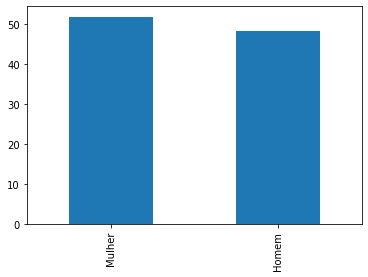

In [18]:
# Qual a distribuição de Homens e mulheres?
(df['genero'].value_counts(1)*100).plot.bar();

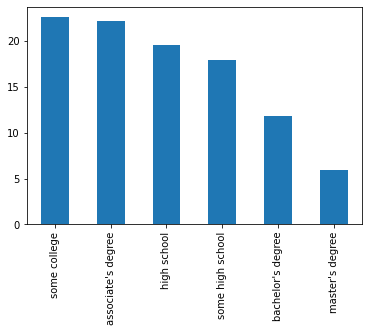

In [19]:
#Qual a distribuição da formação dos pais?
(df['Inst_parental'].value_counts(1)*100).plot.bar();

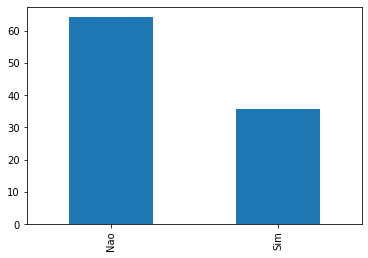

In [20]:
# Quantos estudantes realizaram o teste preparatório?
(df['Curso_prep'].value_counts(1)*100).plot.bar();

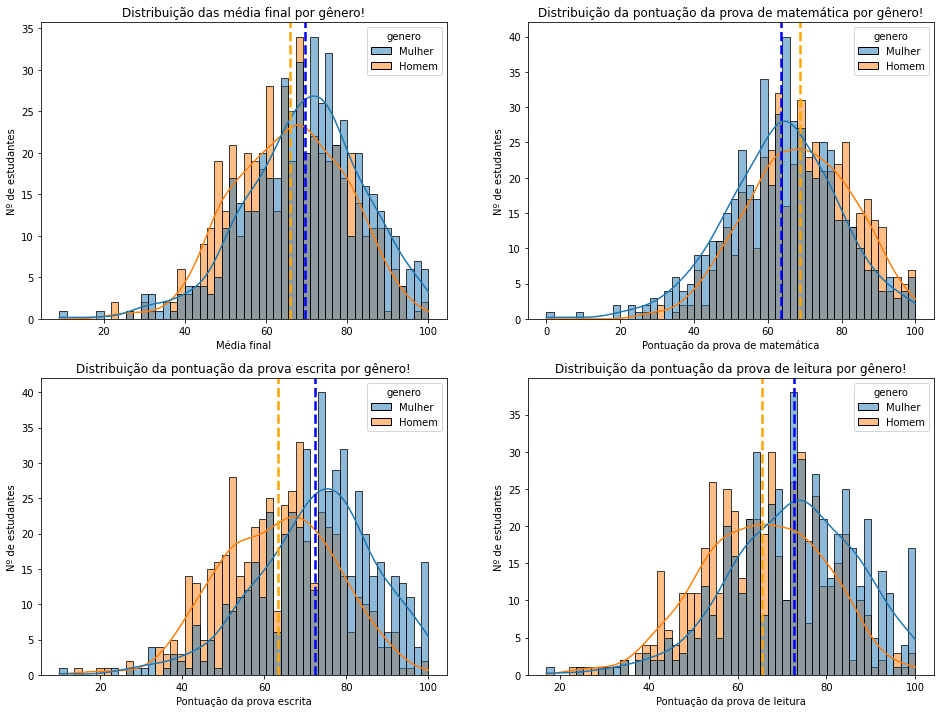

In [21]:
# Como esta distribuidas as notas dos estudantes?
## Média por matéria e a média total:
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(16,12))
ax0,ax1,ax2,ax3 = ax[0][0],ax[0][1],ax[1][0],ax[1][1]


sbs.histplot(data=df,x=df['Med_final'],ax=ax0,stat='count',kde=True,bins=50,hue=df['genero']).set
ax0.axvline(df[df['genero'] == 'Homem']['Med_final'].mean(), color='Orange', alpha=1, ls='--', lw=2.5)
ax0.axvline(df[df['genero'] == 'Mulher']['Med_final'].mean(), color='Blue', alpha=1, ls='--', lw=2.5)
ax0.set_title('Distribuição das média final por gênero!')
ax0.set_xlabel('Média final')
ax0.set_ylabel('Nº de estudantes');

sbs.histplot(data=df,x=df['Pont_mat'],ax=ax1,stat='count',kde=True,bins=50,hue=df['genero'])
ax1.axvline(df[df['genero'] == 'Homem']['Pont_mat'].mean(), color='Orange', alpha=1, ls='--', lw=2.5)
ax1.axvline(df[df['genero'] == 'Mulher']['Pont_mat'].mean(), color='Blue', alpha=1, ls='--', lw=2.5);
ax1.set_title('Distribuição da pontuação da prova de matemática por gênero!')
ax1.set_xlabel('Pontuação da prova de matemática')
ax1.set_ylabel('Nº de estudantes');

sbs.histplot(data=df,x=df['Pont_escrita'],ax=ax2,stat='count',kde=True,bins=50,hue=df['genero'])
ax2.axvline(df[df['genero'] == 'Homem']['Pont_escrita'].mean(), color='Orange', alpha=1, ls='--', lw=2.5)
ax2.axvline(df[df['genero'] == 'Mulher']['Pont_escrita'].mean(), color='Blue', alpha=1, ls='--', lw=2.5);
ax2.set_title('Distribuição da pontuação da prova escrita por gênero!')
ax2.set_xlabel('Pontuação da prova escrita')
ax2.set_ylabel('Nº de estudantes');

sbs.histplot(data=df,x=df['Pont_leitura'],ax=ax3,stat='count',kde=True,bins=50,hue=df['genero'])
ax3.axvline(df[df['genero'] == 'Homem']['Pont_leitura'].mean(), color='Orange', alpha=1, ls='--', lw=2.5)
ax3.axvline(df[df['genero'] == 'Mulher']['Pont_leitura'].mean(), color='Blue', alpha=1, ls='--', lw=2.5)
ax3.set_title('Distribuição da pontuação da prova de leitura por gênero!')
ax3.set_xlabel('Pontuação da prova de leitura')
ax3.set_ylabel('Nº de estudantes');

In [23]:
df.describe()

,Pont_mat,Pont_leitura,Pont_escrita,Med_final
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


# 4. Análise Bivariada

## Comparação entre as variáveis gênero e notas nas provas!!


In [22]:
# Nome das colunas:
df.columns

Index(['genero', 'Etnia', 'Inst_parental', 'Acesso_almoço', 'Curso_prep',
       'Pont_mat', 'Pont_leitura', 'Pont_escrita', 'Tipo_formação_parental',
       'Med_final'],
      dtype='object')

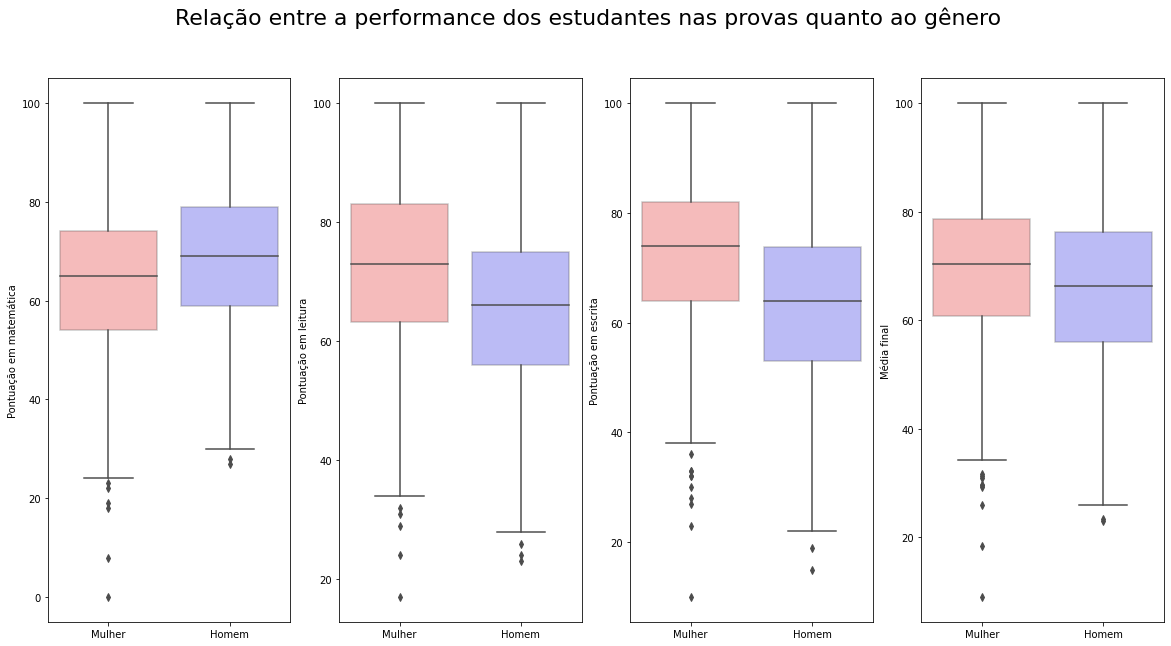

In [98]:
# Criação de um boxplot entre a variável gênero x notas nas provas e da media final:

fig, ax = plt.subplots(ncols=4,nrows=1, figsize=(20,10))
ax0,ax1,ax2,ax3 = ax[0],ax[1],ax[2],ax[3]
fig.suptitle('Relação entre a performance dos estudantes nas provas quanto ao gênero', fontsize=22)

sbs.boxplot(x=df['genero'],y=df['Pont_mat'], ax=ax0, palette=['red','blue'], boxprops=dict(alpha=.3))
ax0.set_ylabel('Pontuação em matemática')
ax0.set_xlabel('');

sbs.boxplot(x=df['genero'],y=df['Pont_leitura'], ax=ax1, palette=['red','blue'], boxprops=dict(alpha=.3))
ax1.set_ylabel('Pontuação em leitura')
ax1.set_xlabel('')

sbs.boxplot(x=df['genero'],y=df['Pont_escrita'], ax=ax2, palette=['red','blue'], boxprops=dict(alpha=.3))
ax2.set_ylabel('Pontuação em escrita')
ax2.set_xlabel('')

sbs.boxplot(x=df['genero'],y=df['Med_final'], ax=ax3, palette=['red','blue'], boxprops=dict(alpha=.3))
ax3.set_ylabel('Média final')
ax3.set_xlabel('');

- Tendo em vista o boxplot, as mulheres tiveram uma performance maior nas duas das três provas em relação ao homens e na média final!

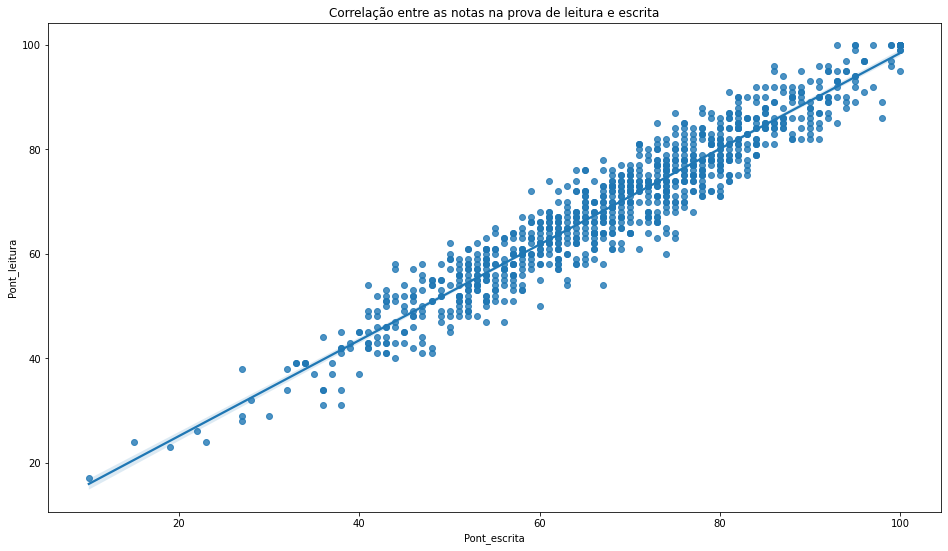

In [26]:
# Correlação entre as variáveis "Pont_Leitura" x "Pont_Escrita"

plt.figure(figsize=(16,9))
plt.title('Correlação entre as notas na prova de leitura e escrita')
plt.xlabel('Pontuação da prova escrita')
plt.ylabel('Pontuação da prova de leitura')
sbs.regplot(x=df['Pont_escrita'], y=df['Pont_leitura']);

- Existe uma correlação muito alta e positiva entre a pontuação dos estudantes na prova de escrita com a prova de leitura!

In [27]:
# Qual a diferença na média de cada uma das notas entre os gêneros?
female = df.query('genero == "Mulher"')
male = df.query('genero == "Homem"')

In [28]:
round(male.describe(),2), round(female.describe(),2)

(       Pont_mat  Pont_leitura  Pont_escrita  Med_final
 count    482.00        482.00        482.00     482.00
 mean      68.73         65.47         63.31      65.84
 std       14.36         13.93         14.11      13.70
 min       27.00         23.00         15.00      23.00
 25%       59.00         56.00         53.00      56.00
 50%       69.00         66.00         64.00      66.33
 75%       79.00         75.00         73.75      76.25
 max      100.00        100.00        100.00     100.00,
        Pont_mat  Pont_leitura  Pont_escrita  Med_final
 count    518.00        518.00        518.00     518.00
 mean      63.63         72.61         72.47      69.57
 std       15.49         14.38         14.84      14.54
 min        0.00         17.00         10.00       9.00
 25%       54.00         63.25         64.00      60.67
 50%       65.00         73.00         74.00      70.33
 75%       74.00         83.00         82.00      78.67
 max      100.00        100.00        100.00   

In [29]:
print(f'A média das mulheres na pontuação de matemática ({round(female.Pont_mat.mean(),2)}) foi menor em relação a dos homens ({round(male.Pont_mat.mean(),2)})!')
print(f'A média das mulheres na pontuação de leitura ({round(female.Pont_leitura.mean(),2)}) foi maior em relação a dos homens ({round(male.Pont_leitura.mean(),2)})!')
print(f'A média das mulheres na pontuação de leitura ({round(female.Pont_escrita.mean(),2)}) foi maior em relação a dos homens ({round(male.Pont_escrita.mean(),2)})!')
print(f'A média final das mulheres ({round(female.Med_final.mean(),2)}) foi maior em relação a dos homens ({round(male.Med_final.mean(),2)})!')

A média das mulheres na pontuação de matemática (63.63) foi menor em relação a dos homens (68.73)!
A média das mulheres na pontuação de leitura (72.61) foi maior em relação a dos homens (65.47)!
A média das mulheres na pontuação de leitura (72.47) foi maior em relação a dos homens (63.31)!
A média final das mulheres (69.57) foi maior em relação a dos homens (65.84)!


  - **As mulheres apresentaram um rendimento médio maior em 2 das 3 provas em relação aos homens, apresentando uma média final maior!**

## Comparação entre a variável nivel de formação dos país e e as notas nas prova!

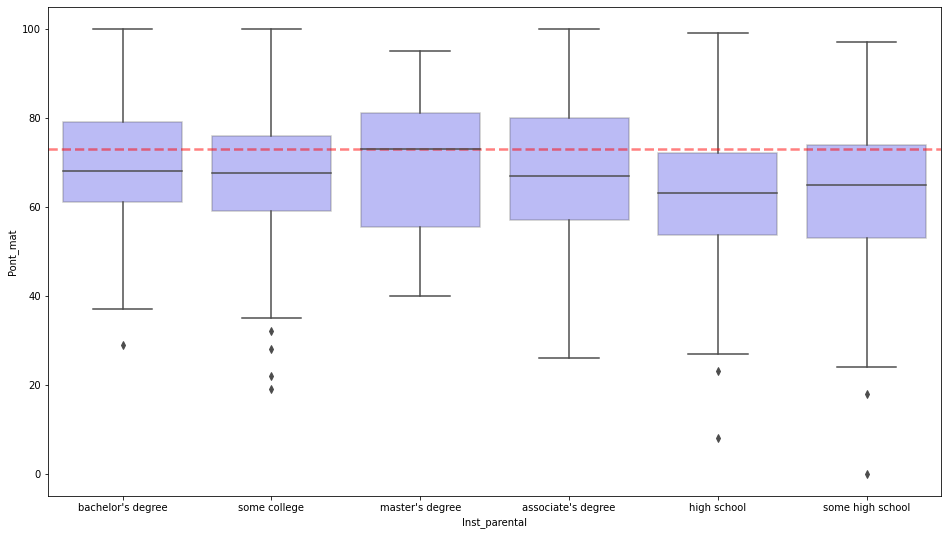

In [32]:
# Será que a formação dos pais influenciou a nota da prova de matemática dos estudantes?
## Foi criado um boxplot para visualizar a influencia da instrução parental na nota dos seus filhos na prova de matemática:
fig, ax = plt.subplots(figsize=(16,9))

sbs.boxplot(x=df['Inst_parental'],y=df['Pont_mat'], ax=ax, color='blue', boxprops=dict(alpha=.3))
ax.axhline(df[df['Inst_parental']=="master's degree"]['Pont_mat'].median(),color='red',alpha=.5, ls='--',lw=2.5); 

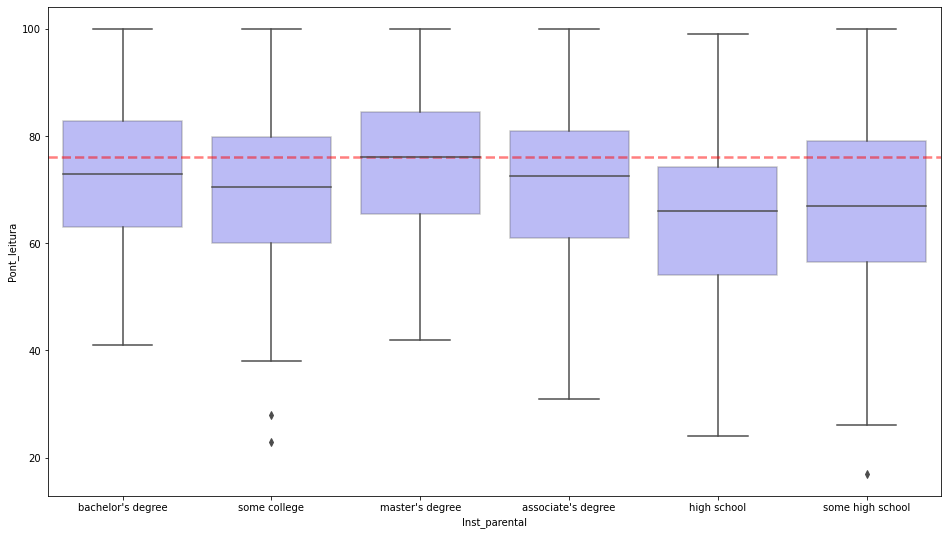

In [33]:
## Foi criado um boxplot para visualizar a influencia da instrução parental na nota dos seus filhos na prova de leitura:   
fig, ax = plt.subplots(figsize=(16,9))

sbs.boxplot(x=df['Inst_parental'],y=df['Pont_leitura'], ax=ax, color='blue', boxprops=dict(alpha=.3))
ax.axhline(df[df['Inst_parental']=="master's degree"]['Pont_leitura'].median(), color='red',alpha=.5, ls='--',lw=2.5); 

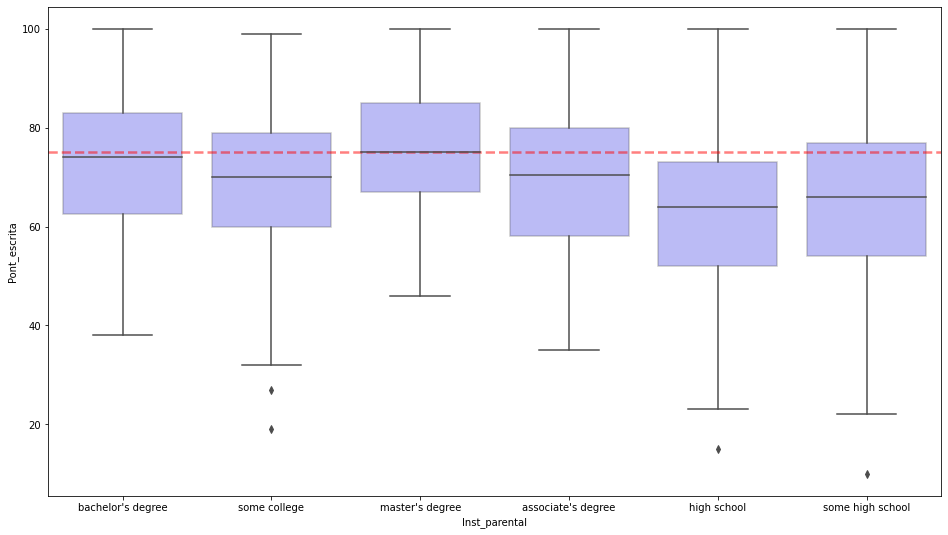

In [34]:
## Foi criado um boxplot para visualizar a influencia da instrução parental na nota dos seus filhos na prova de escrita:
    
fig, ax = plt.subplots(figsize=(16,9))

sbs.boxplot(x=df['Inst_parental'],y=df['Pont_escrita'], ax=ax, color='blue', boxprops=dict(alpha=.3))
ax.axhline(df[df['Inst_parental']=="master's degree"]['Pont_escrita'].median(), color='red',alpha=.5, ls='--',lw=2.5);

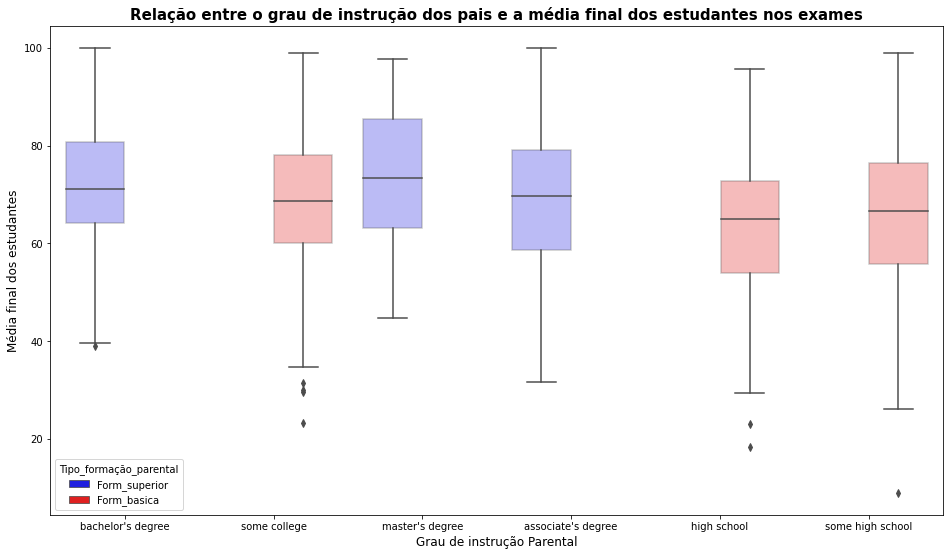

In [40]:
## Foi criado um boxplot para visualizar a influencia da instrução parental na nota dos seus filhos na média final:
    
fig, ax = plt.subplots(figsize=(16,9))

sbs.boxplot(x=df['Inst_parental'],y=df['Med_final'], ax=ax, hue=df['Tipo_formação_parental'],
            palette = ['blue','red'], color='blue', boxprops=dict(alpha=.3))
ax.set_xlabel('Grau de instrução Parental',size=12)
ax.set_ylabel('Média final dos estudantes', size=12)
ax.set_title('Relação entre o grau de instrução dos pais e a média final dos estudantes nos exames',
             loc='center', size=15,weight='bold');

- Foi visto até o momento que, quanto maior a formação do pai, maior foi a média final dos estudantes!

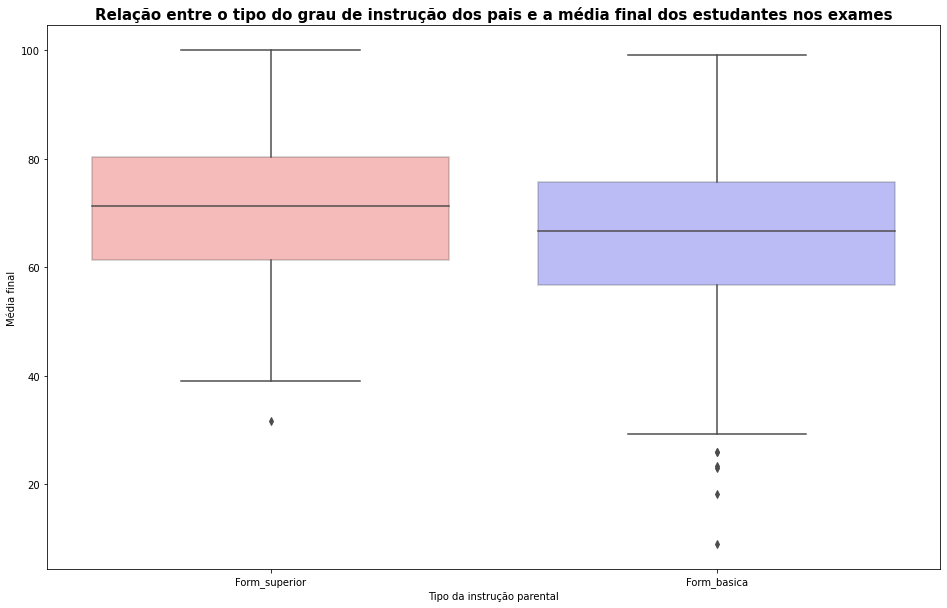

In [34]:
# Foi criado, por fim, um boxplot para saber se o tipo de instrução dos pais impactou na perfomance dos estudantes:
fig, ax = plt.subplots(figsize=(16,10))
             
sbs.boxplot(x=df['Tipo_formação_parental'], y=df['Med_final'], ax=ax, palette=['red','blue'], boxprops=dict(alpha=.3))
ax.set_xlabel('Tipo da instrução parental')
ax.set_ylabel('Média final')
ax.set_title('Relação entre o tipo do grau de instrução dos pais e a média final dos estudantes nos exames',loc='center', size=15,weight='bold');

In [37]:
# Foi criado dois dataframes baseado no critério tipo de formação parental:
school = df.query('Tipo_formação_parental == "Form_basica"')
grad = df.query('Tipo_formação_parental == "Form_superior"')


## E comparado qual dos grupos, os estudantes obtiveram maior média final:
school.Med_final.mean(), grad.Med_final.mean()

(65.71866888519136, 70.86130325814537)

 - **Os estudantes cujos pais tiveram um tipo de formação de nivel superior obtiveram uma média maior nas provas em relação àqueles cujos pais tiveram apenas formação de nivel básico!**

## Comparação entre a realização do teste preparatório e o resultado nas provas:


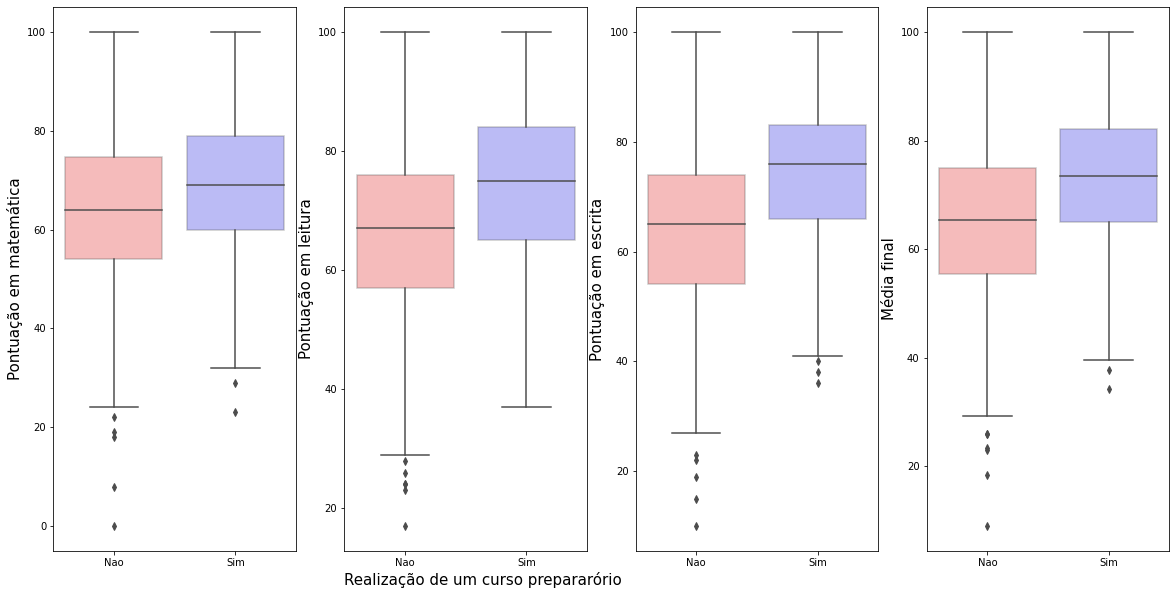

In [68]:
fig, ax = plt.subplots(ncols=4,nrows=1,figsize=(20,10))
ax0,ax1,ax2,ax3 = ax[0],ax[1],ax[2],ax[3]

sbs.boxplot(x=df['Curso_prep'],y=df['Pont_mat'], ax=ax0, palette=['red','blue'], boxprops=dict(alpha=.3));
ax0.set_xlabel('')
ax0.set_ylabel('Pontuação em matemática',size=15)

sbs.boxplot(x=df['Curso_prep'],y=df['Pont_leitura'], ax=ax1, palette=['red','blue'], boxprops=dict(alpha=.3));
ax1.set_xlabel('Realização de um curso prepararório', size=15, loc='left')
ax1.set_ylabel('Pontuação em leitura',size=15)

sbs.boxplot(x=df['Curso_prep'],y=df['Pont_escrita'], ax=ax2, palette=['red','blue'], boxprops=dict(alpha=.3));
ax2.set_xlabel('')
ax2.set_ylabel('Pontuação em escrita',size=15)

sbs.boxplot(x=df['Curso_prep'],y=df['Med_final'], ax=ax3, palette=['red','blue'], boxprops=dict(alpha=.3))
ax3.set_xlabel('')
ax3.set_ylabel('Média final',size=15);

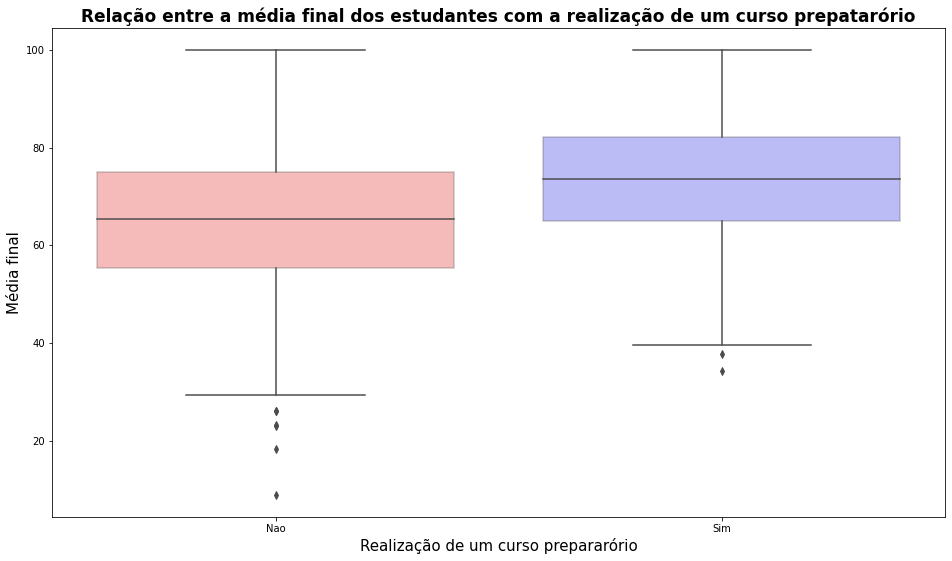

In [84]:
#Criação dos boxplot da variável realização de um curso preparatório x média final dos discentes:
fig, ax = plt.subplots(figsize=(16,9))
sbs.boxplot(x=df['Curso_prep'],y=df['Med_final'], palette=['red','blue'], boxprops=dict(alpha=.3))
ax.set_ylabel('Média final',size=15)
ax.set_xlabel('Realização de um curso prepararório', size=15, loc='center')
ax.set_title('Relação entre a média final dos estudantes com a realização de um curso prepatarório', 
             loc='center',size=17, weight='bold');

In [40]:
# Comparação da média:
presente = df.query("Curso_prep == 'Sim'")
ausente = df.query("Curso_prep == 'Nao'")

presente.Med_final.mean(), ausente.Med_final.mean()

(72.66946927374299, 65.038800623053)

  - **Os estudantes que realizaram um curso preparatória obtiveram uma média maior em relação àqueles que não o fizeram!!**

## Comparação entre o acesso ao almoço pelos estudantes e o resultado nas provas:


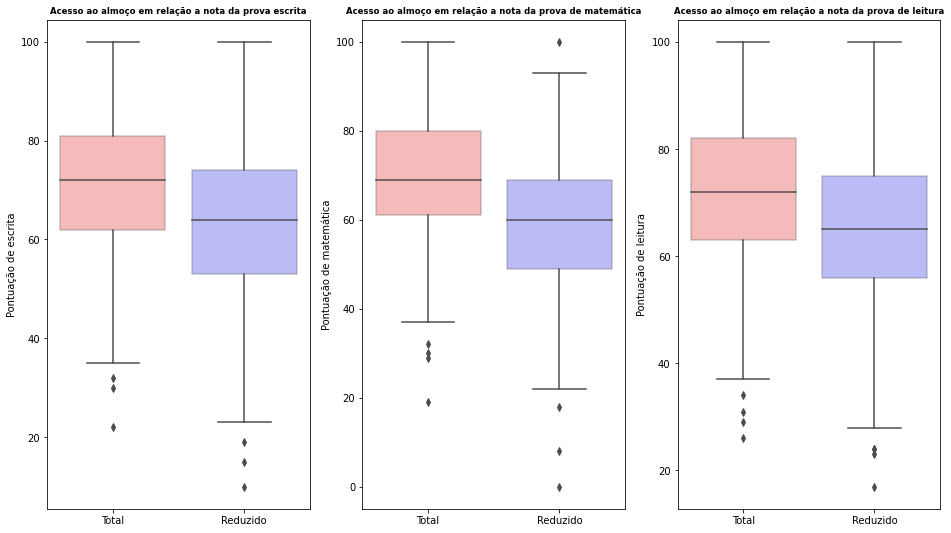

In [103]:
## Os estudantes que tiveram acesso ao almoço completo obtiveram maior notas nas provas em relação ao que tiveram acesso reduzido?
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(16,9))
ax0,ax1,ax2 = ax[0],ax[1],ax[2]

sbs.boxplot(x=df['Acesso_almoço'],y=df['Pont_escrita'], ax=ax0, palette=['red','blue'], boxprops=dict(alpha=.3))
ax0.set_title('Acesso ao almoço em relação a nota da prova escrita',loc='center', size=8.5,weight='bold')
ax0.set_xlabel('')
ax0.set_ylabel('Pontuação de escrita')

sbs.boxplot(x=df['Acesso_almoço'],y=df['Pont_mat'], ax=ax1, palette=['red','blue'], boxprops=dict(alpha=.3))
ax1.set_title('Acesso ao almoço em relação a nota da prova de matemática',loc='center', size=8.5,weight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Pontuação de matemática'); 

sbs.boxplot(x=df['Acesso_almoço'],y=df['Pont_leitura'], ax=ax2, palette=['red','blue'], boxprops=dict(alpha=.3))
ax2.set_title('Acesso ao almoço em relação a nota da prova de leitura',loc='center', size=8.5,weight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Pontuação de leitura'); 

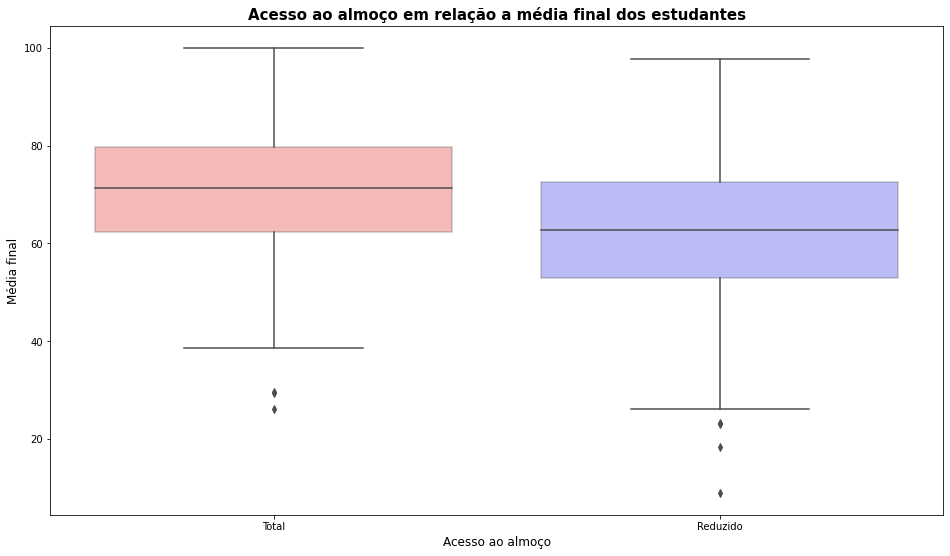

In [101]:
# Criação de um boxplot compararando a média final dos estudantes nas provas em relaçao ao tipo de acesso ao almoço:
fig, ax = plt.subplots(figsize=(16,9))
sbs.boxplot(x=df['Acesso_almoço'],y=df['Med_final'], palette=['red','blue'], boxprops=dict(alpha=.3))
ax.set_title('Acesso ao almoço em relação a média final dos estudantes',loc='center', size=15,weight='bold')
ax.set_xlabel('Acesso ao almoço',size=12)
ax.set_ylabel('Média final', size=12); 

- **Foi observado que o estudantes que tiveram acesso ao almoço completo, obtiveram maior notas nas provas realizadas!**

# 5. Análise multivariada

## Comparação dos estudantes que realizaram o curso preparatório com a performance nos testes em relação ao tipo de formação dos pais

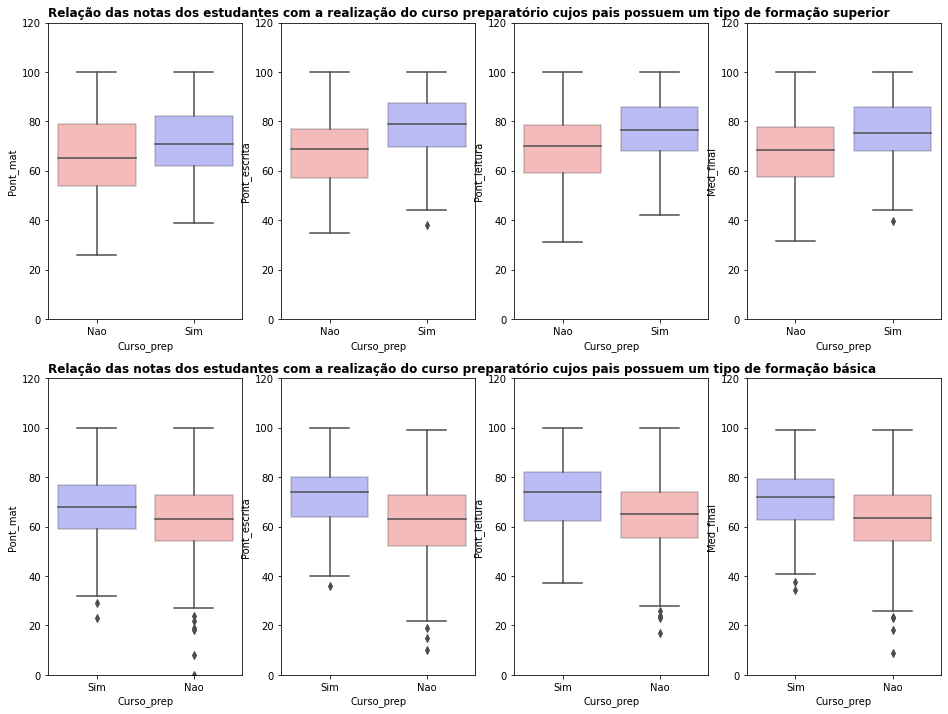

In [46]:

fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(16,12))
ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7 = ax[0][0],ax[0][1],ax[0][2],ax[0][3],ax[1][0],ax[1][1],ax[1][2],ax[1][3]


sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_superior']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_superior']['Pont_mat'], ax=ax0, palette=['red','blue'], boxprops=dict(alpha=.3));
ax0.set_title('Relação das notas dos estudantes com a realização do curso preparatório cujos pais possuem um tipo de formação superior', loc='left', weight='bold',size=12)
ax0.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_superior']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_superior']['Pont_escrita'], ax=ax1, palette=['red','blue'], boxprops=dict(alpha=.3));
ax1.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_superior']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_superior']['Pont_leitura'], ax=ax2, palette=['red','blue'], boxprops=dict(alpha=.3));
ax2.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_superior']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_superior']['Med_final'], ax=ax3, palette=['red','blue'], boxprops=dict(alpha=.3));
ax3.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_basica']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_basica']['Pont_mat'], ax=ax4, palette=['blue','red'], boxprops=dict(alpha=.3));
ax4.set_title('Relação das notas dos estudantes com a realização do curso preparatório cujos pais possuem um tipo de formação básica', loc='left', weight='bold',size=12)
ax4.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_basica']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_basica']['Pont_escrita'], ax=ax5, palette=['blue','red'], boxprops=dict(alpha=.3));
ax5.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_basica']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_basica']['Pont_leitura'], ax=ax6, palette=['blue','red'], boxprops=dict(alpha=.3));
ax6.set_ylim(0,120)

sbs.boxplot(x=df[df['Tipo_formação_parental']=='Form_basica']['Curso_prep'],y=df[df['Tipo_formação_parental']=='Form_basica']['Med_final'], ax=ax7, palette=['blue','red'], boxprops=dict(alpha=.3));
ax7.set_ylim(0,120);

- **Tanto nos pais com algum tipo de formação superior como naqueles com algum tipo de formação básica, os estudantes que realizaram um curso preparatório apresentaram melhores notas!**

## Comparação da Média final dos estudantes com a realização do curso preparatório em relação ao tipo de acesso ao almoço

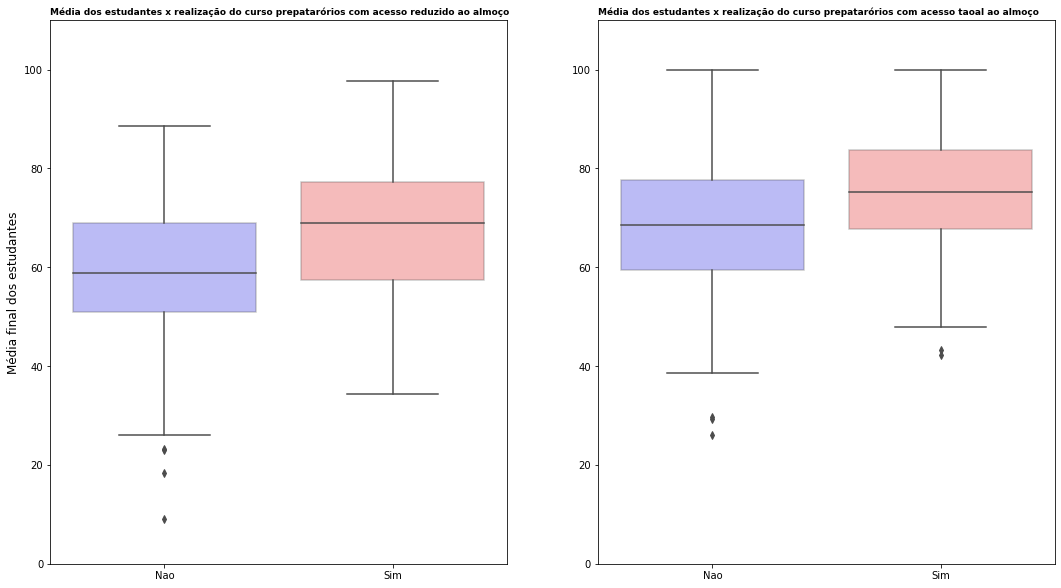

In [109]:
# Criação de um boxplot comparando a média dos estudantes que tiveram acesso total e reduzido ao almoço 
# com a realização do curso preparatório
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(18,10))
ax0, ax1 = ax[0], ax[1]

sbs.boxplot(x=df[df['Acesso_almoço']=='Reduzido']['Curso_prep'], y=df[df['Acesso_almoço']=='Reduzido']['Med_final'], 
            ax=ax0, palette=['blue','red'],boxprops=dict(alpha=.3))
ax0.set_title("Média dos estudantes x realização do curso prepatarórios com acesso reduzido ao almoço",
              loc='left', weight='bold',size=9)
ax0.set_xlabel('')
ax0.set_ylabel('Média final dos estudantes',size=12)
ax0.set_ylim(0,110)

sbs.boxplot(x=df[df['Acesso_almoço']=='Total']['Curso_prep'], y=df[df['Acesso_almoço']=='Total']['Med_final'], 
            ax=ax1, palette=['blue','red'],boxprops=dict(alpha=.3));
ax1.set_title("Média dos estudantes x realização do curso prepatarórios com acesso taoal ao almoço",
              loc='left', weight='bold',size=9)
ax1.set_xlabel('')
ax1.set_ylabel("")
ax1.set_ylim(0,110);

- Foi visto de acordo com os dados, que os estudantes que tiveram acesso ao almoço completo e fizeram curso preparatório obtiveram uma média total maior daqueles que fizeram o curso prepatarório porém com acesso reduzido ao almoço!


- **Isso demonstra que o acesso ao almoço completo pode ter um impacto positivos na aprendizagem e performance dos estudantes**!

# 6. Considerações finais!

## **Tendo em vista o resultados das análises, pode-se observar:**
**O nivel de formação educacional dos pais interfere no desempenho dos filhos?**
  
 * Sim, os filhos cujos pais tiveram algum tipo de formação superior, obtiveram uma maior performance nos testes!
  
  
**O investimento em um curso preparativo auxiliou em uma maior nota?**

 * Sim, a realização de um curso prepatarório para as provas impactou positivamente na performance dos estuantes!


**Existiu diferença em cada tipo de prova entre os gêneros?**

 * Sim, os homens obtiveram maiores médias em matemática, enquanto que as mulheres obtiveram maior médias em leitura e escrita e de modo geral!*


**Existe alguma correlação entre as notas das provas?**

* Existe uma correlação forte e positiva entre as notas dos estudantes nas provas de leitura e escrita!*
 

**Existe alguma associação entre o acesso completo ao almoço com a performance dos estudantes?**

* Sim, estudantes que tiveram acesso total ao almoço obtiveram maior notas!**

### Além disto, foi observado que o acesso ao almoço é um fator relevante na performance dos estudantes, tendo em vista que ao analisar a média final dos mesmos daqueles que realizaram o curso de preparação, os estudantes que tiveram acesso total ao almoço, obtiveram um média maior dentre eles!

###  Isto demonstra que o investimento em politícas públicas para implentação do acesso à alimentação de qualidade aos estudantes, pode impactar positivamente em seus resultados acadêmicos!